## Logistic Classification(Regression)

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.14.0


##  데이터 생성

- x_train : 학습 데이터
- x_test  : 테스트 데이터

In [ ]:
x_train = [[1., 2.],[2., 3.],[3., 1.],[4., 3.],[5., 3.],[6., 2.]]
y_train = [  [0.],    [0.],    [0.],    [1.],    [1.],    [1.]  ]

x_test = [[5.,2.]]
y_test = [[1.]]


x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

print("x1 = ",x1)
print("x2 = ",x2)

x1 =  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
x2 =  [2.0, 3.0, 1.0, 3.0, 3.0, 2.0]


## 그래프 작성

[0]
[0]
[0]
[1]
[1]
[1]
colors =  [0, 0, 0, 1, 1, 1]


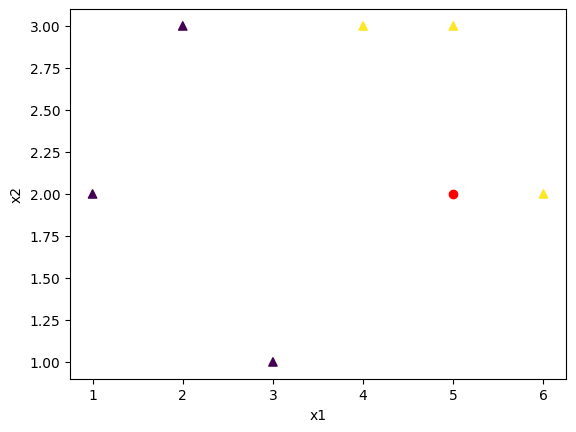

In [ ]:
for y in y_train:
  print ([int(y[0]%2)])

colors = [int(y[0] % 2) for y in y_train]
print("colors = ", colors)

plt.scatter(x1,x2, c=colors , marker='^')
plt.scatter(x_test[0][0],x_test[0][1], c="red")

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## 데이터 변환- numpy array

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))
print(dataset)

for features, labels  in dataset:
  print("feature = ", features)
  print("labels = ",labels)

<_BatchDataset element_spec=(TensorSpec(shape=(None, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>
feature =  tf.Tensor(
[[1. 2.]
 [2. 3.]
 [3. 1.]
 [4. 3.]
 [5. 3.]
 [6. 2.]], shape=(6, 2), dtype=float32)
labels =  tf.Tensor(
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]], shape=(6, 1), dtype=float32)


## 파라메터 정의

In [ ]:
W = tf.Variable(tf.zeros([2,1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

print("weigths = ",W)
print("bias = ",b)

weigths =  <tf.Variable 'weight:0' shape=(2, 1) dtype=float32, numpy=
array([[0.],
       [0.]], dtype=float32)>
bias =  <tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


## 함수 정의

In [ ]:
#def logistic_regression(features):
#    hypothesis  = tf.divide(1., 1. + tf.exp(-(tf.matmul(features, W) + b)))
#    return hypothesis

def logistic_regression(features):
    hypothesis  = tf.sigmoid(tf.matmul(features, W) + b)
    return hypothesis

def loss_fn(hypothesis, features, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(logistic_regression(features))
                            + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

def grad(features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features),features,labels)
    return tape.gradient(loss_value, [W,b])



In [ ]:
print("feature = ", features)

W = tf.Variable(tf.zeros([2,1]), name='weight')
b = tf.Variable(tf.ones([1]), name='bias')
print("weigths = ",W)
print("bias = ",b)


hypothesis  = tf.sigmoid(tf.matmul(features, W) + b)

print("hypothesis = ", hypothesis)

feature =  tf.Tensor(
[[1. 2.]
 [2. 3.]
 [3. 1.]
 [4. 3.]
 [5. 3.]
 [6. 2.]], shape=(6, 2), dtype=float32)
weigths =  <tf.Variable 'weight:0' shape=(2, 1) dtype=float32, numpy=
array([[0.],
       [0.]], dtype=float32)>
bias =  <tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([1.], dtype=float32)>
hypothesis =  tf.Tensor(
[[0.7310586]
 [0.7310586]
 [0.7310586]
 [0.7310586]
 [0.7310586]
 [0.7310586]], shape=(6, 1), dtype=float32)


In [50]:
W =  tf.constant([[1.],[2.]])
print(" Weight = ",W)

b =  tf.constant([1.])
print(" bias = ",b)

 Weight =  tf.Tensor(
[[1.]
 [2.]], shape=(2, 1), dtype=float32)
 bias =  tf.Tensor([1.], shape=(1,), dtype=float32)


### hypothesis 함수

In [51]:
hypothesis  = tf.sigmoid(tf.matmul(features, W) + b)
print("hypothesis = ", hypothesis)

hypothesis =  tf.Tensor(
[[0.99752736]
 [0.9998766 ]
 [0.99752736]
 [0.9999833 ]
 [0.99999386]
 [0.9999833 ]], shape=(6, 1), dtype=float32)


### tf.cast 함수

In [52]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
print("tf.cast = ", predicted)

tf.cast =  tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]], shape=(6, 1), dtype=float32)


### tf. equal 함수

In [53]:
tmp = tf.equal(predicted, labels)
print("tf.equal = ", tmp)
tmp = tf.cast(tf.equal(predicted, labels), dtype=tf.float32)
print("tf.cast = ", tmp)
accuracy = tf.reduce_mean(tmp)

print("tf.reduce_mean = ", accuracy)

tf.equal =  tf.Tensor(
[[False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]], shape=(6, 1), dtype=bool)
tf.cast =  tf.Tensor(
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]], shape=(6, 1), dtype=float32)
tf.reduce_mean =  tf.Tensor(0.5, shape=(), dtype=float32)


### 출석과제

*   가상의 데이터 수집
*   features의 shape(2,10)  => [[1., 2.] ,.. [6., 2.]]
*   labels의 shape(1,10) = [  [0.], ... [1.]  ]
*   hypothesis  = tf.sigmoid(tf.matmul(features, W) + b) 계산
*   hypothesis > 0.5인 경우 True(1), 나머지는 False(0) 를 적용
*   accuracy  계산 :  tf. equal, tf.cast, tf.reduce_mean 사용









## 실행

In [ ]:
EPOCHS = 1501

W = tf.Variable(tf.zeros([2,1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')


x_test = [[5.,2.]]
y_test = [[1.]]   # Accuracy: 1.0000
#y_test = [[0.]]  # Accuracy: 0.0000

for step in range(EPOCHS):
    for features, labels  in iter(dataset):
        grads = grad(features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}"
              .format(step, loss_fn(logistic_regression(features),features,labels)))
test_acc = accuracy_fn(logistic_regression(x_test),y_test)
print("Test data Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.6874
Iter: 100, Loss: 0.5776
Iter: 200, Loss: 0.5349
Iter: 300, Loss: 0.5054
Iter: 400, Loss: 0.4838
Iter: 500, Loss: 0.4671
Iter: 600, Loss: 0.4535
Iter: 700, Loss: 0.4420
Iter: 800, Loss: 0.4319
Iter: 900, Loss: 0.4228
Iter: 1000, Loss: 0.4144
Iter: 1100, Loss: 0.4066
Iter: 1200, Loss: 0.3992
Iter: 1300, Loss: 0.3922
Iter: 1400, Loss: 0.3855
Iter: 1500, Loss: 0.3790
Test data Accuracy: 1.0000


## 실습 과제

*   통계청 자료에서 데이터를 검색하여 동일한 과정을 실행
*   Cost 변화 그래프 작성
*   정확도(Accuracy) 확인
*   항목 추가

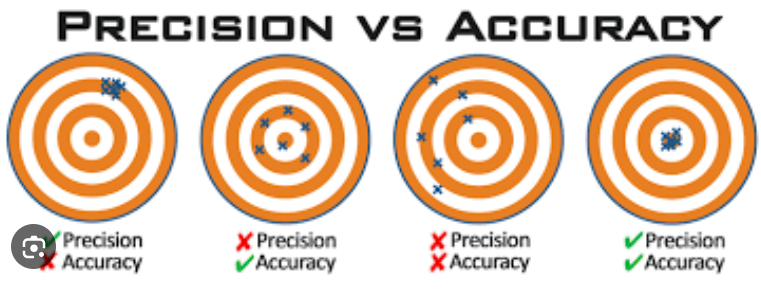



